# Analyze Hyperparameter Tuning


In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
import sys
FILENAME = "f_KNN_MUTAG_TEST_2024-06-26_15-52-52_results.csv"

In [2]:

filepath= "configs/results/Hyperparameter_tuning_results/HP_20251012_SVC_Random-Walk-Edit_precomputed_MUTAG.xlsx"

In [3]:

# # find the file in the directory
# filepath = None
# for root, dirs, files in os.walk("."):
#     if FILENAME in files:
#         filepath = os.path.join(root, FILENAME)
#         break


In [4]:
hyper_df = pd.read_excel(filepath)
display(len(hyper_df))
display(hyper_df.head(10))

600

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,param_decay_lambda,param_kernel_type,param_max_walk_length,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,fold_index
0,1.376099,0.195050,0.731053,0.140044,0.062470,balanced,0.051516,precomputed,-1,"{'C': 0.062470212915072515, 'class_weight': 'b...",0.829545,0.950900,0.813665,0.766407,0.816850,0.835473,0.061565,12,0
1,0.091945,0.003641,0.042630,0.026961,0.005189,balanced,0.030982,precomputed,5,"{'C': 0.005188830048882201, 'class_weight': 'b...",0.687500,0.895833,0.777778,0.766407,0.850000,0.795504,0.071919,30,0
2,0.117384,0.059886,0.066327,0.030885,0.004257,NaN,0.122411,precomputed,5,"{'C': 0.004257493427669912, 'class_weight': No...",0.920635,0.906832,0.777778,0.766407,0.850000,0.844330,0.063659,6,0
3,0.112152,0.037041,0.045073,0.032915,3.969919,balanced,0.394618,precomputed,4,"{'C': 3.969918711004302, 'class_weight': 'bala...",0.920635,0.895833,0.807445,0.766407,0.850000,0.848064,0.056338,4,0
4,0.035788,0.020214,0.059987,0.023165,0.187750,balanced,0.054007,precomputed,2,"{'C': 0.18775027837633293, 'class_weight': 'ba...",0.411765,0.895833,0.777778,0.302326,0.856459,0.648832,0.243727,40,0
5,0.078732,0.022842,0.041163,0.028170,0.143967,NaN,0.041828,precomputed,4,"{'C': 0.14396656970097205, 'class_weight': Non...",0.876881,0.852700,0.777778,0.622857,0.850000,0.796043,0.092718,28,0
6,0.057639,0.025988,0.025664,0.022928,0.325885,NaN,0.249679,precomputed,2,"{'C': 0.32588522630174627, 'class_weight': Non...",0.920635,0.567308,0.777778,0.622857,0.856459,0.749007,0.134728,39,0
7,0.071793,0.021121,0.026417,0.020572,0.403263,balanced,0.093777,precomputed,3,"{'C': 0.40326269105365986, 'class_weight': 'ba...",0.687500,0.852700,0.807445,0.766407,0.856459,0.794102,0.062660,31,0
8,0.037866,0.022906,0.047065,0.026470,0.025574,balanced,0.009408,precomputed,2,"{'C': 0.025573973256384084, 'class_weight': 'b...",0.876881,0.906832,0.777778,0.766407,0.816850,0.828950,0.054845,16,0
9,0.068366,0.021703,0.024550,0.020359,0.260656,balanced,0.327697,precomputed,2,"{'C': 0.26065571791309816, 'class_weight': 'ba...",0.876881,0.906832,0.777778,0.622857,0.856459,0.808162,0.102031,23,0


In [5]:
results_column ="mean_test_score"

In [6]:
# a function that gets two column names form the df, one result column, which represents the score, and one regarding a certain hyperparameter.
# this second parameter, can be categorical or numerical.
# if its categorical, i want a box plot, plotting the mean and max score for each category
# if its numerical, i want a scatter plot, plotting the score against the hyperparameter value
def plot_hyperparameter_effect(hyper_df, hyperparameter_column, results_column, Model_Name):
    if hyperparameter_column not in hyper_df.columns:
        print(f"Column {hyperparameter_column} not found in DataFrame.")
        return
    if results_column not in hyper_df.columns:
        print(f"Column {results_column} not found in DataFrame.")
        return

    # check if the hyperparameter column is numerical or categorical
    plt.figure(figsize=(10, 6))
    plt.title(f'{Model_Name} - Effect of {hyperparameter_column} on {results_column}')

    if pd.api.types.is_numeric_dtype(hyper_df[hyperparameter_column]):
        # numerical, scatter plot
        
        sns.scatterplot(data=hyper_df, x=hyperparameter_column, y=results_column)
        # add a line plot for better visibility
        sns.lineplot(data=hyper_df, x=hyperparameter_column, y=results_column, errorbar=None, color='orange')
        sns.regplot(data=hyper_df, x=hyperparameter_column, y=results_column, scatter=False, color='green', label='Trend Line')
        plt.xlabel(hyperparameter_column)
        plt.ylabel(results_column)
        plt.grid(True)
        plt.show()
    else:
        # categorical, bor plot
        # summary_df = hyper_df.groupby(hyperparameter_column)[results_column].agg(['mean', 'max']).reset_index()
        # summary_df = summary_df.melt(id_vars=hyperparameter_column, value_vars=['mean', 'max'], var_name='Statistic', value_name='Score')

        # Use violinplot for richer distribution visualization
        sns.violinplot(data=hyper_df, x=hyperparameter_column, y=results_column, inner="box", density_norm='width')
        # Overlay mean and max points for each category
        summary_df = hyper_df.groupby(hyperparameter_column)[results_column].agg(['mean', 'max']).reset_index()
        sns.scatterplot(data=summary_df, x=hyperparameter_column, y="mean", color="blue", label="Mean", marker="o", s=100, zorder=10)
        sns.scatterplot(data=summary_df, x=hyperparameter_column, y="max", color="red", label="Max", marker="X", s=100, zorder=10)
        plt.xlabel(hyperparameter_column)
        plt.ylabel(results_column)
        plt.legend(title='Statistic')
        plt.xticks(rotation=45)
        plt.grid(axis='y')
        plt.show()

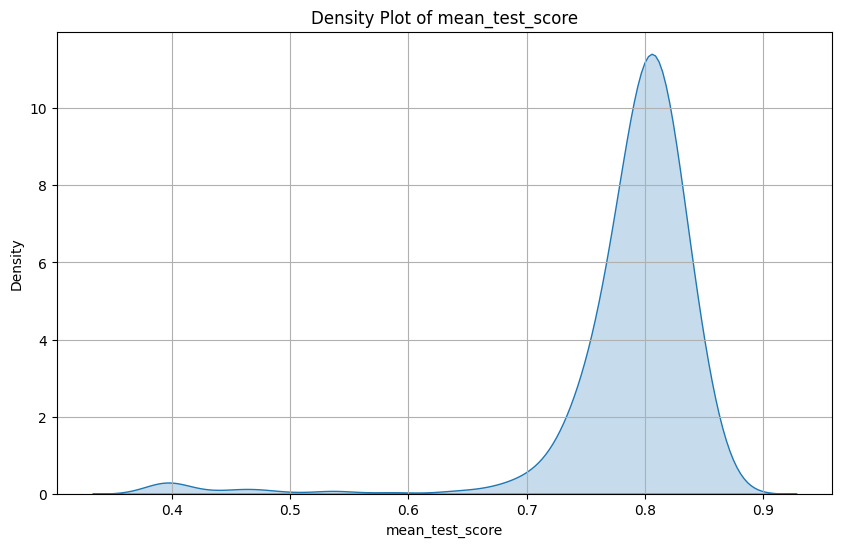

In [7]:
# plot the desity of the results collumn
plt.figure(figsize=(10, 6))
plt.title(f'Density Plot of {results_column}')
sns.kdeplot(data=hyper_df, x=results_column, fill=True)
plt.xlabel(results_column)
plt.ylabel('Density')
plt.grid(True)
plt.show()

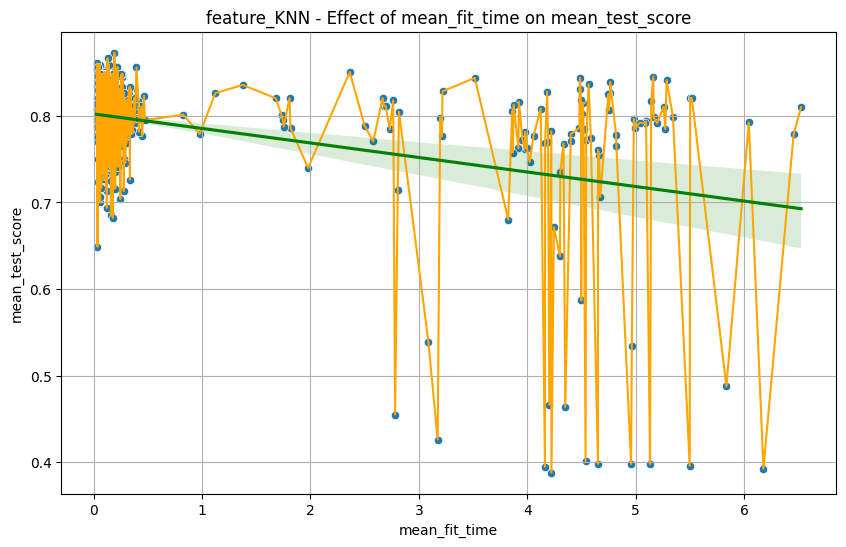

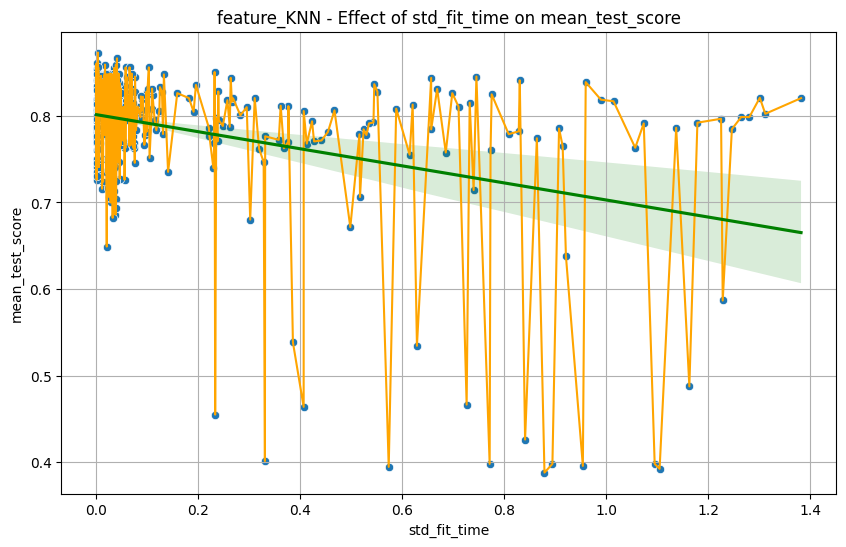

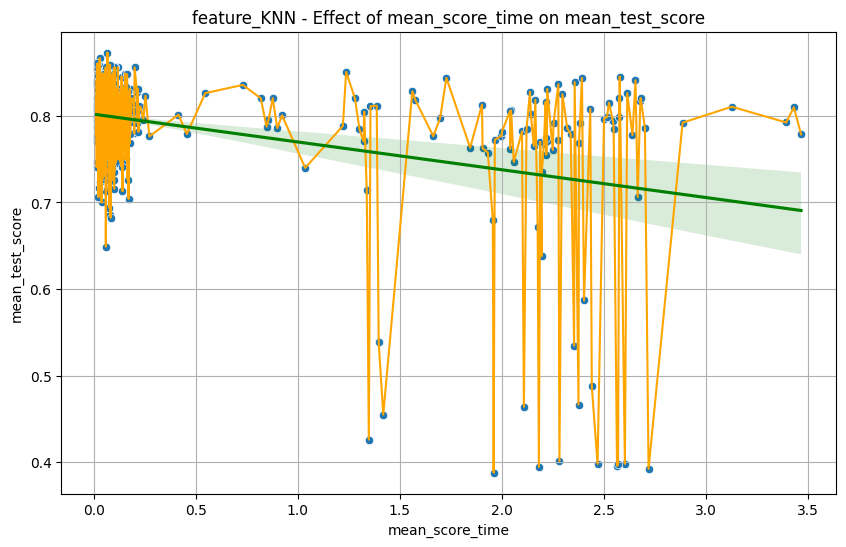

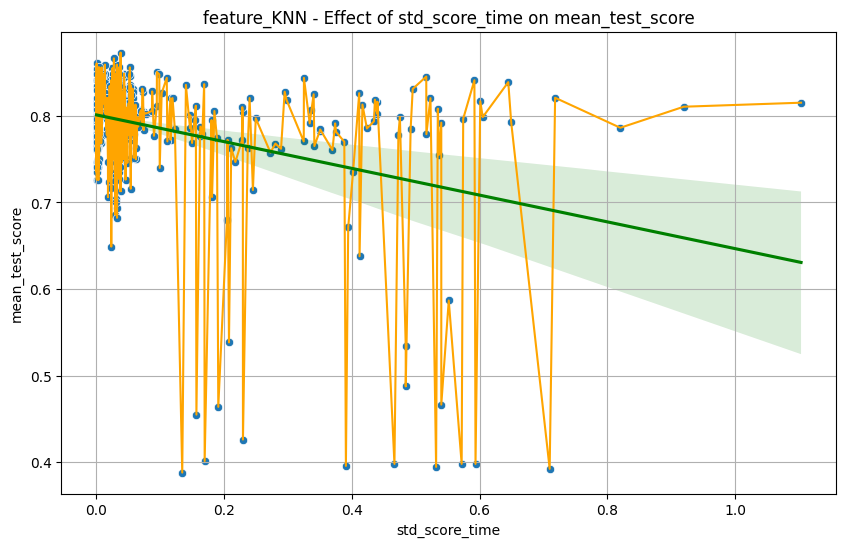

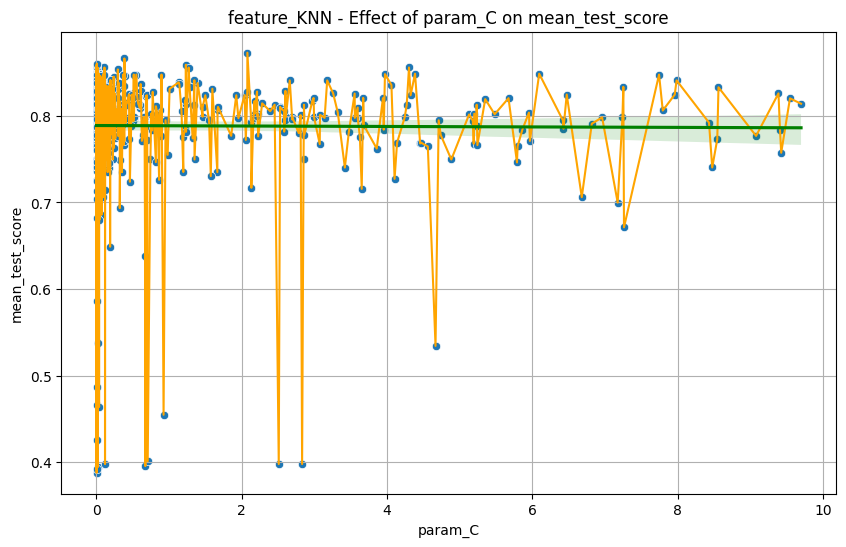

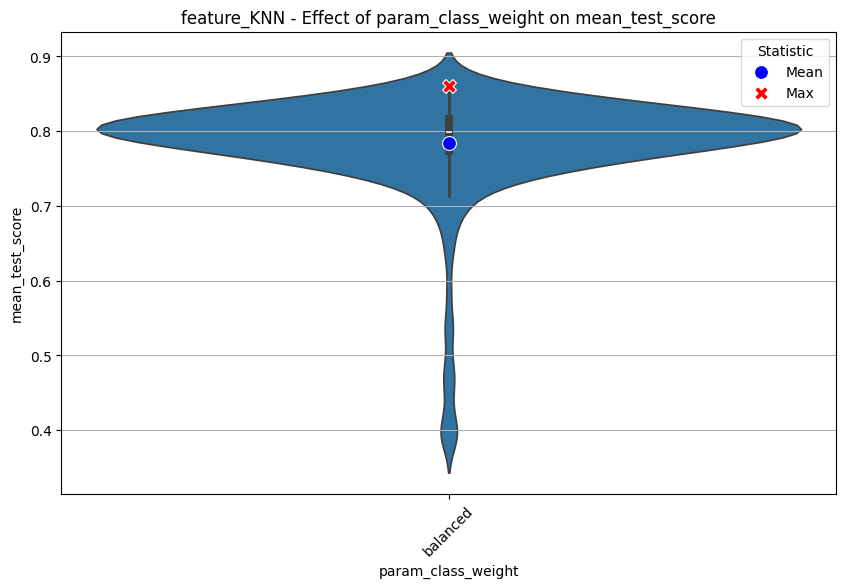

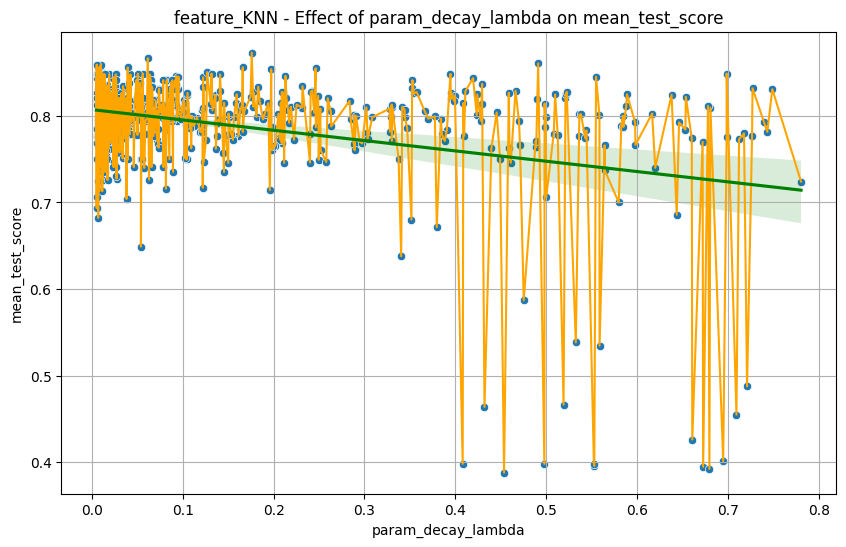

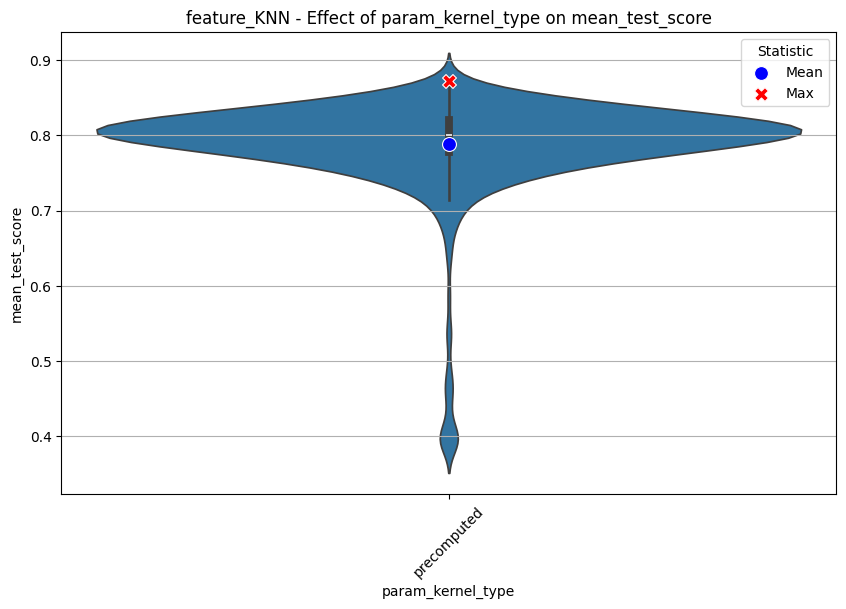

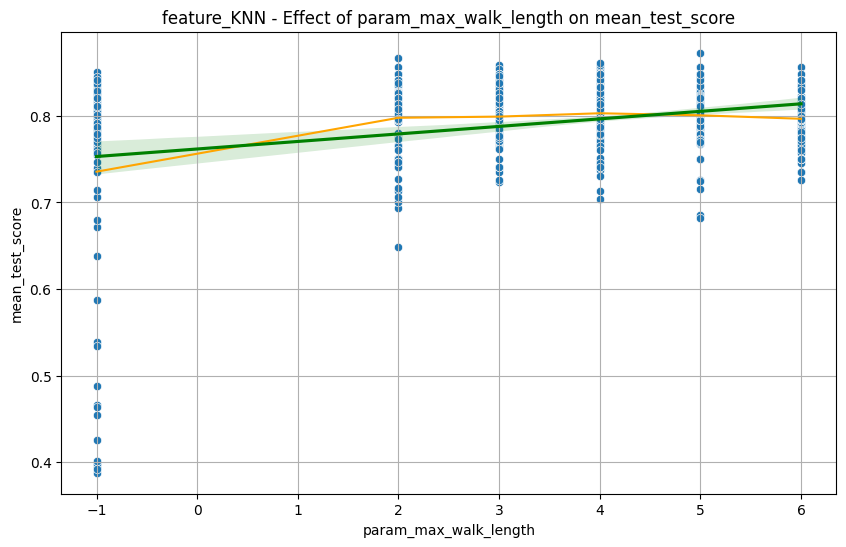

/home/sischuma/miniconda3/envs/GED_Bakeoff_env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


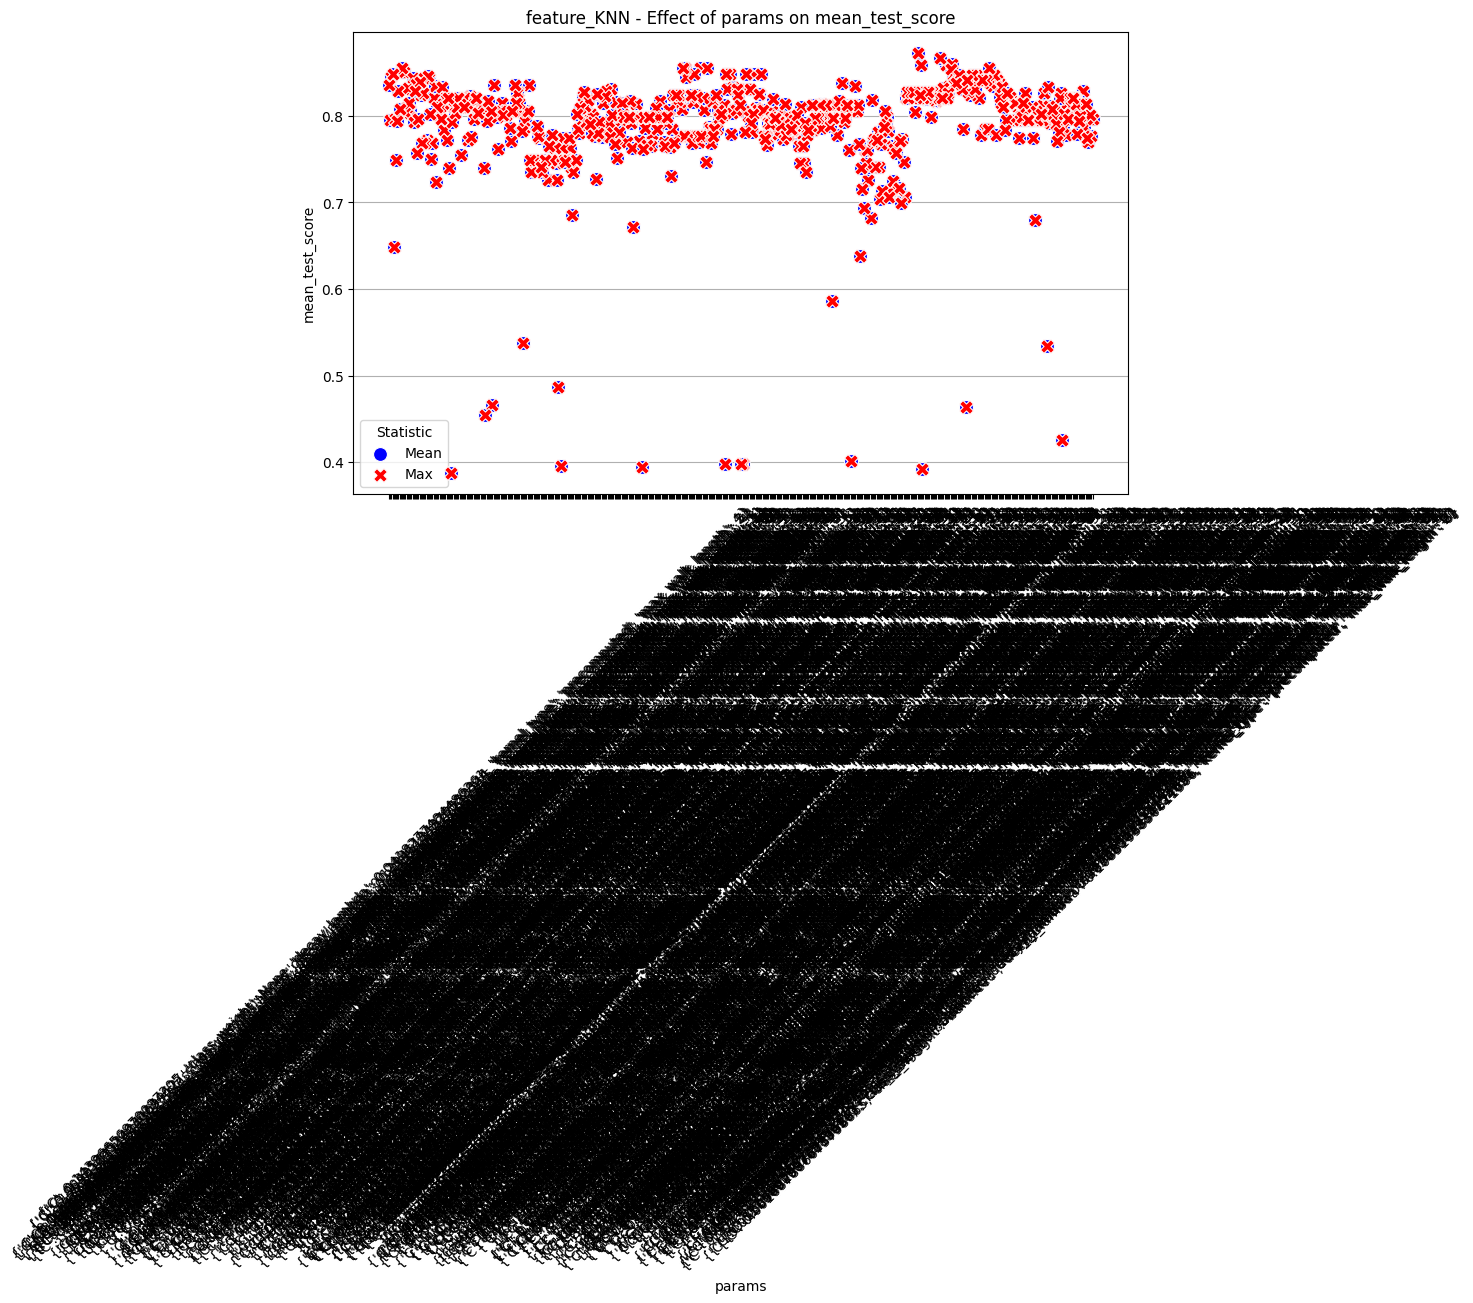

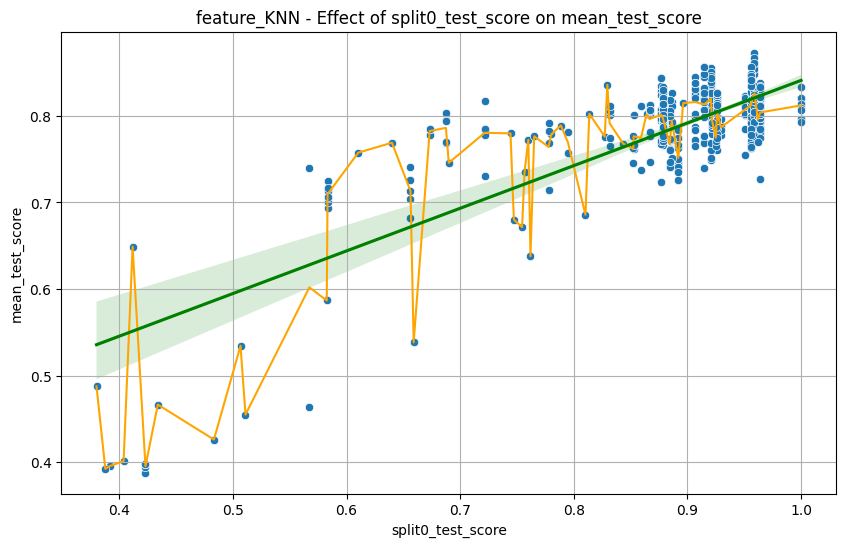

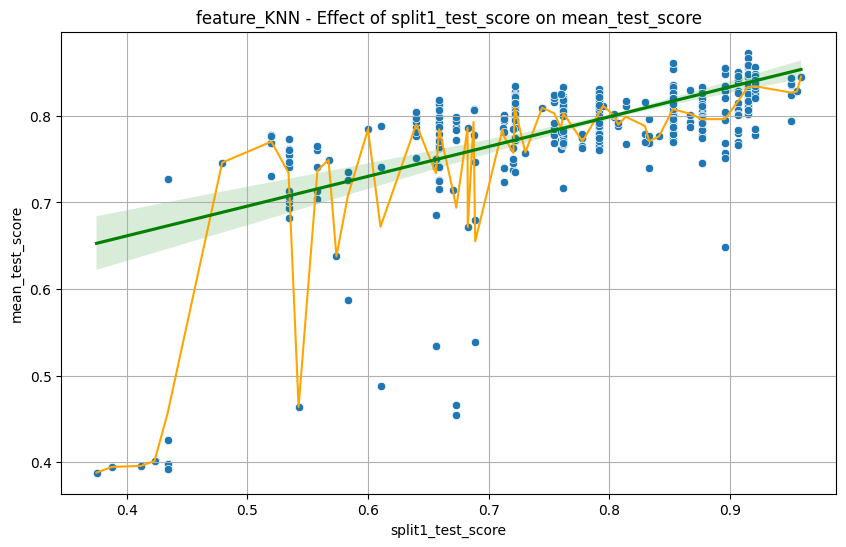

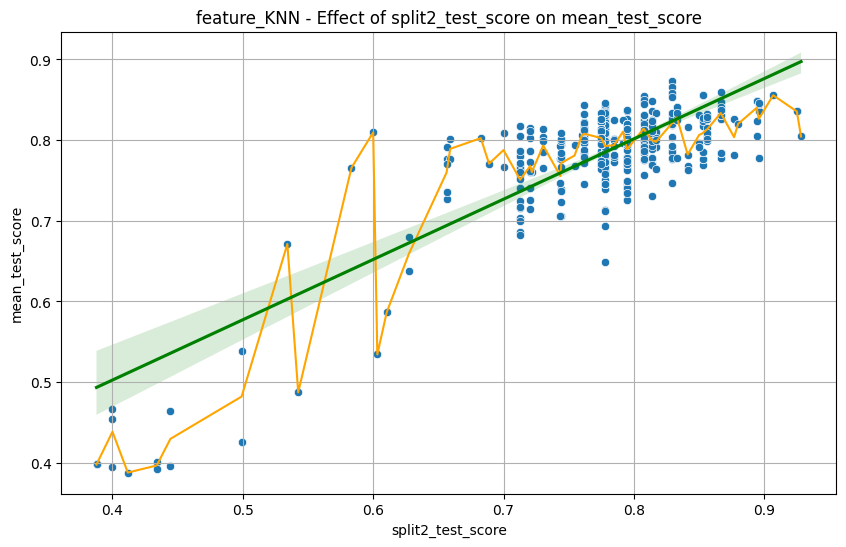

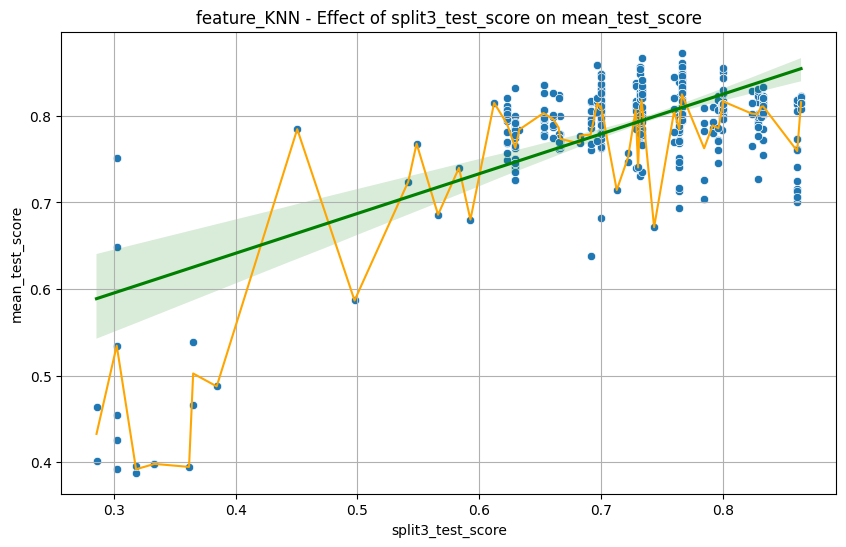

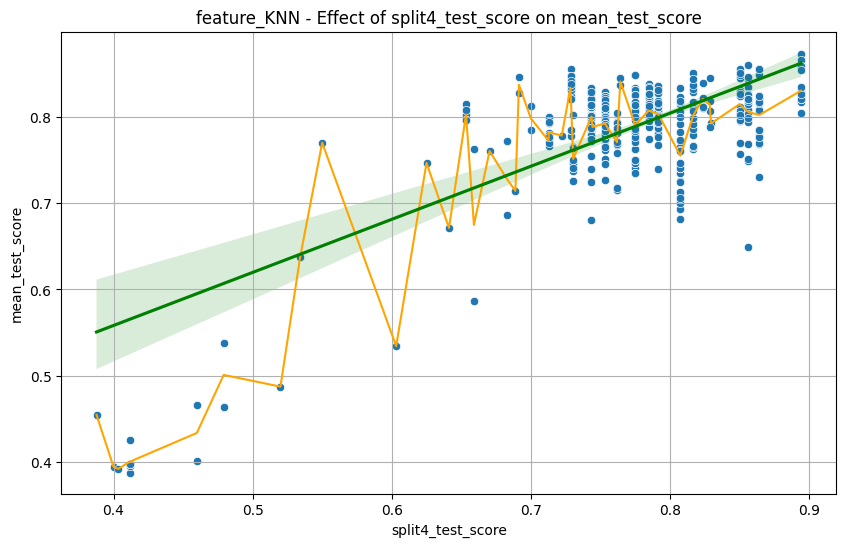

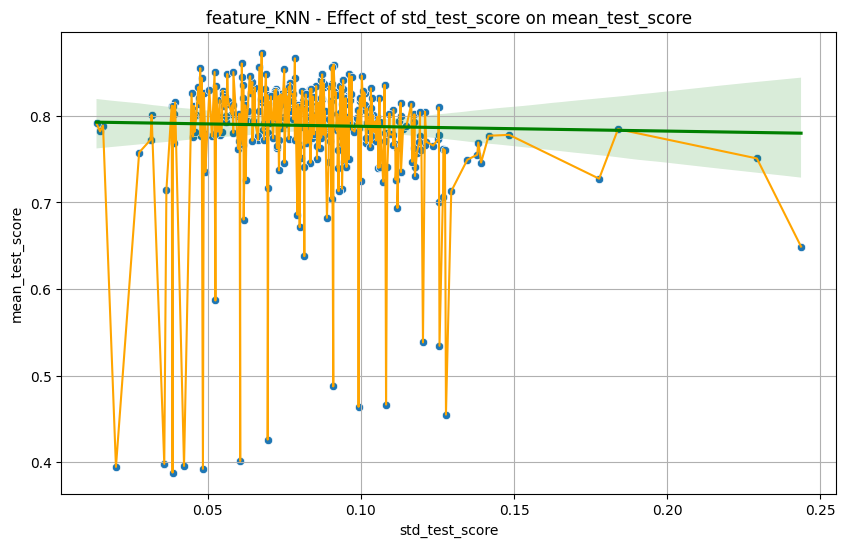

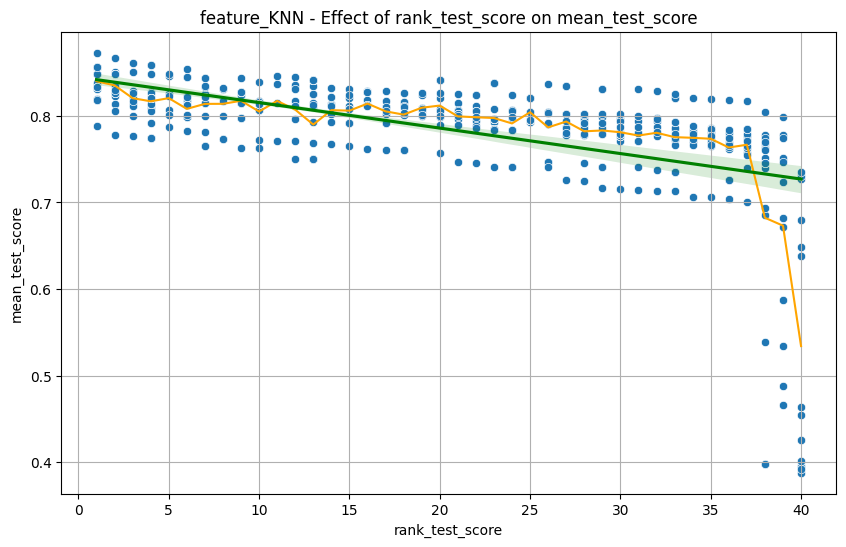

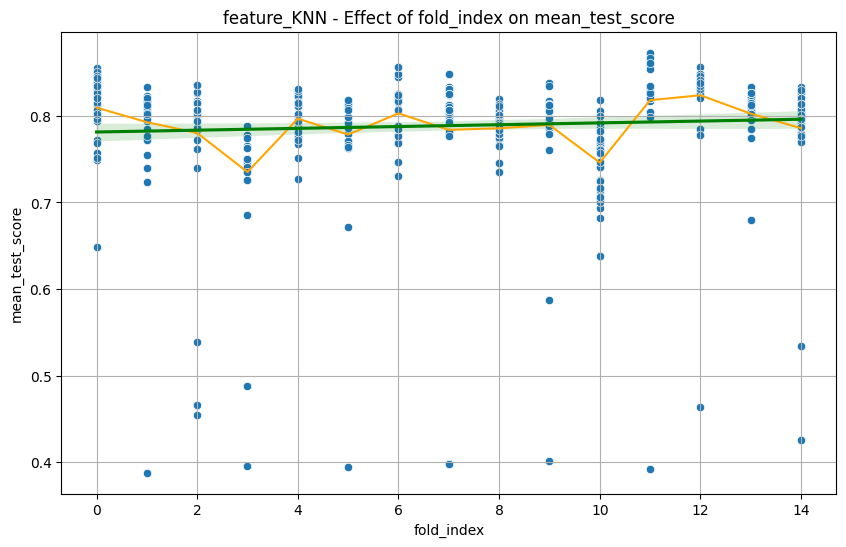

In [8]:
results_column = "mean_test_score"
Model_Name = "feature_KNN"

for col in hyper_df.columns:
    if col != results_column:
        plot_hyperparameter_effect(hyper_df, col, results_column, Model_Name)

In [9]:
display(hyper_df.sort_values(by='mean_test_score', ascending=False).head(30))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,param_decay_lambda,param_kernel_type,param_max_walk_length,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,fold_index
450,0.192043,0.002939,0.067764,0.037783,2.076728,NaN,0.175937,precomputed,5,"{'C': 2.076727711194229, 'class_weight': None,...",0.958960,0.914773,0.829545,0.766407,0.894242,0.872786,0.067580,1,11
469,0.129236,0.040244,0.029730,0.027323,0.384008,NaN,0.061602,precomputed,2,"{'C': 0.3840083414715558, 'class_weight': None...",0.958960,0.914773,0.829545,0.733333,0.894242,0.866171,0.078418,2,11
479,0.034441,0.000180,0.018618,0.000249,0.005432,balanced,0.491150,precomputed,4,"{'C': 0.00543189183812179, 'class_weight': 'ba...",0.958960,0.852700,0.866667,0.766407,0.856459,0.860239,0.061095,3,11
474,0.055649,0.016791,0.025917,0.013152,0.003970,NaN,0.005341,precomputed,4,"{'C': 0.003970415512008203, 'class_weight': No...",0.958960,0.914773,0.829545,0.696970,0.894242,0.858898,0.091067,4,11
453,0.139939,0.038049,0.080545,0.031764,1.230233,NaN,0.009756,precomputed,3,"{'C': 1.2302333816635074, 'class_weight': None...",0.958960,0.914773,0.829545,0.696970,0.894242,0.858898,0.091067,4,11
271,0.219785,0.064971,0.100691,0.003019,0.011155,balanced,0.009423,precomputed,5,"{'C': 0.011155072609792368, 'class_weight': 'b...",0.914773,0.914773,0.852700,0.732143,0.864253,0.855728,0.066825,1,6
252,0.216988,0.102786,0.103534,0.008404,0.109703,NaN,0.009331,precomputed,2,"{'C': 0.10970309598585361, 'class_weight': Non...",0.914773,0.914773,0.852700,0.732143,0.864253,0.855728,0.066825,1,6
265,0.395665,0.002373,0.200744,0.052282,0.009648,NaN,0.166045,precomputed,6,"{'C': 0.009648410817468249, 'class_weight': No...",0.914773,0.914773,0.852700,0.732143,0.864253,0.855728,0.066825,1,6
250,0.202004,0.057278,0.118892,0.035400,4.300656,balanced,0.006668,precomputed,3,"{'C': 4.300655885645533, 'class_weight': 'bala...",0.914773,0.914773,0.852700,0.732143,0.864253,0.855728,0.066825,1,6
511,0.042124,0.003529,0.058931,0.004530,1.268454,balanced,0.039460,precomputed,5,"{'C': 1.2684540246140947, 'class_weight': 'bal...",0.955556,0.920635,0.906832,0.766407,0.728507,0.855587,0.090502,1,12
